In [1]:
import tensorflow as tf
import numpy as np
from formatData import loadData
from sklearn.model_selection import train_test_split
from gan import GenAdvNetwork
import os
from matplotlib import pyplot as plt

2023-03-15 23:52:04.306064: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
"""
Loading data
Note than we can only specify absolute location of the raw data
"""
molRep2D, energies = loadData(12, "/home/panthibivek/thesis/GAN_pkg/data/traj.xyz")
#randomize the data and split it into training and test set
# unison_shuffle(molRep2D, energies)
X_train, X_test, y_train, y_test = train_test_split(molRep2D,energies,
                                   random_state=104, 
                                   test_size=0.1, 
                                   shuffle=True)

print("Training data size:", X_train.shape)
print("Test data size:", X_test.shape)

input data size: (10000, 78)
output data size: (10000,)
Training data size: (9000, 78)
Test data size: (1000, 78)


In [3]:
latent_dim_ = 78
epochs_ = 50
batch_size_ = 32
y_train = np.reshape(y_train, (-1, 1))
X_train = np.array(X_train)
X_train = X_train.astype(float)
X_train = np.reshape(X_train, (-1, 78, 1))
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.shuffle(buffer_size=100).batch(batch_size_)

2023-03-15 23:52:06.716367: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 23:52:06.716441: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 23:52:06.763640: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 23:52:06.763711: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 23:52:06.763756: I tensorflow/compiler/xla/stream_executo

In [4]:
GAN_model = GenAdvNetwork(latent_dim=latent_dim_, batch_size=batch_size_)
GAN_model.compile(
    generator_opt=tf.keras.optimizers.Adam(learning_rate=0.001),
    discriminator_opt=tf.keras.optimizers.Adam(learning_rate=0.001),
    disc_loss=tf.keras.losses.BinaryCrossentropy(),
    gen_loss=tf.keras.losses.MAE
)
history = GAN_model.fit(dataset, epochs=epochs_)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                1027      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 13)                0         
                                                                 
 reshape (Reshape)           (None, 13, 1)             0         
                                                                 
 conv1d_transpose (Conv1DTra  (None, 39, 128)          640       
 nspose)                                                         
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 39, 128)           0         
                                                                 
 batch_normalization (BatchN  (None, 39, 128)          512       
 ormalization)                                           

2023-03-15 23:52:06.851598: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:06.852799: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:06.861412: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:06.862037: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:06.865522: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:06.866177: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:06.867049: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:06.867664: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:06.868144: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:06

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 26, 64)            320       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 26, 64)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 13, 128)           32896     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 13, 128)           0         
                                                                 
 batch_normalization_2 (Batc  (None, 13, 128)          512       
 hNormalization)                                                 
                                                                 
 flatten (Flatten)           (None, 1664)              0         
                                                     

2023-03-15 23:52:06.980544: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:06.981091: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:06.991811: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:06.992582: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.011146: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.011758: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.027051: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.027594: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.035955: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07

Epoch 1/50


2023-03-15 23:52:07.063852: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.066224: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.068462: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.069114: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.069852: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.070505: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.070970: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.072229: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.072687: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07

  1/282 [..............................] - ETA: 40s - g_loss: 7.2609 - d_loss: 0.6714

2023-03-15 23:52:07.191830: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.192851: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.193783: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.194483: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.195510: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.196286: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.200098: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.201294: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07.202235: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-15 23:52:07

282/282 [==============================] - 18s 64ms/step - g_loss: 6.5271 - d_loss: 0.0621
Epoch 2/50
282/282 [==============================] - 18s 64ms/step - g_loss: 3.9025 - d_loss: 1.7158e-04
Epoch 3/50
282/282 [==============================] - 18s 65ms/step - g_loss: 3.2503 - d_loss: 1.1693e-04
Epoch 4/50
282/282 [==============================] - 18s 65ms/step - g_loss: 2.9826 - d_loss: 1.0731e-04
Epoch 5/50
282/282 [==============================] - 18s 65ms/step - g_loss: 2.7997 - d_loss: 1.2585e-05
Epoch 6/50
282/282 [==============================] - 18s 65ms/step - g_loss: 2.6428 - d_loss: 0.0021
Epoch 7/50
282/282 [==============================] - 18s 64ms/step - g_loss: 2.5527 - d_loss: 2.1621e-05
Epoch 8/50
282/282 [==============================] - 18s 64ms/step - g_loss: 2.4110 - d_loss: 7.7573e-05
Epoch 9/50
282/282 [==============================] - 18s 65ms/step - g_loss: 2.1839 - d_loss: 0.0016
Epoch 10/50
282/282 [==============================] - 18s 65ms/step 

In [5]:
train_dir = os.path.dirname(os.path.abspath("__file__")) + "/runs/train/exp2/weights/"
GAN_model.save_weights(train_dir, save_format='tf')

2023-03-16 00:07:23.596662: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-16 00:07:23.623437: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-16 00:07:23.624101: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-16 00:07:23.624604: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-16 00:07:23.625057: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-16 00:07:23.625445: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-16 00:07:23.626275: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-16 00:07:23.626612: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-16 00:07:23.627567: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-16 00:07:23

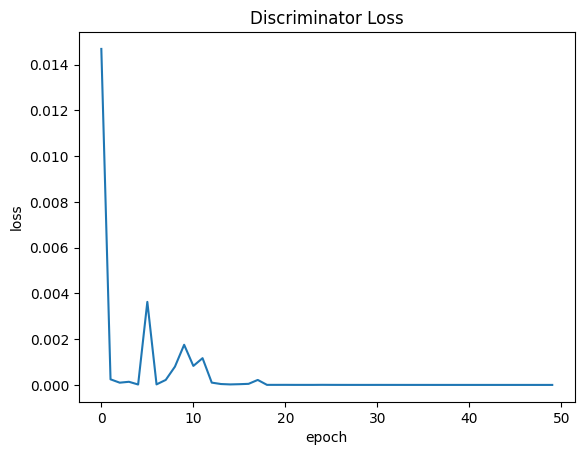

In [6]:
plt.plot(history.history['d_loss'])
plt.title('Discriminator Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
fig1 = plt.gcf()
plt.show()
fig1.savefig(train_dir + 'disLoss.png', dpi = 300)

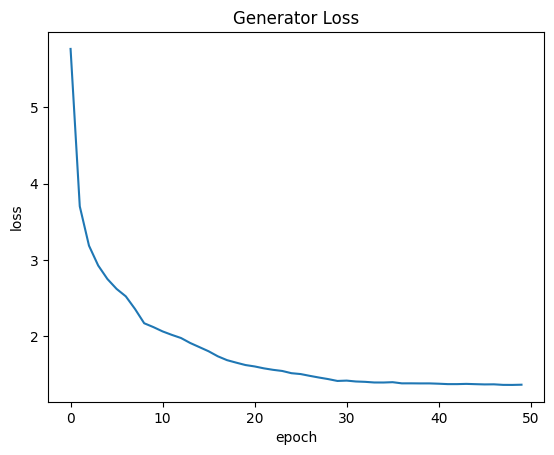

In [7]:
plt.plot(history.history['g_loss'])
plt.title('Generator Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
fig2 = plt.gcf()
plt.show()
fig2.savefig(train_dir + 'genLoss.png', dpi = 300)

In [8]:
from utils import random_generator
# generated_sample = GAN_model.generate_trajectories(1)
random_data = random_generator((1, latent_dim_))
print(random_data)
generated_sample = GAN_model.generator(random_data)
print(generated_sample)

tf.Tensor(
[[ 1.27851796  1.49934161  1.74736714  0.48287973  0.46290603  1.0884701
  -2.41582894  0.27634904  0.26595232  1.14635086 -0.12126417 -2.04880333
  -0.65833801 -0.36846864 -1.03106618  1.13102186 -0.06380575 -0.10764212
  -1.28609109 -0.10333313  0.83538896 -1.36470819  1.25421298  0.94918352
  -0.85435843  0.13813119 -1.47877538  1.66795599 -0.26460418  0.96899462
   0.39327618  1.09520078  0.77019876 -1.3424387  -0.8986724   1.33385801
   0.50161201  0.17921399 -0.40724516  0.85570669  1.81715035  1.28706253
   1.40216553  1.8487879   0.71245611  0.37824053  0.6475662   0.54159737
   0.52726853 -0.57518047 -0.13912641  0.07448176  1.92810464 -0.02731843
   0.78139263 -0.68012172  0.75627631 -0.55924475 -1.94261372 -0.76526892
  -0.21872711  0.54195547 -1.57195807 -1.23826647  0.94096333 -0.13797644
  -0.91840261  1.70256472 -0.52472782 -0.45858303  0.21697842  2.56306958
  -0.03071873 -0.59171104  0.62029713 -0.48893017  0.96083122 -0.67944276]], shape=(1, 78), dtype=floa